### Recommendation System
**1. 추천 시스템 구분**
  + Personalized recommender(개인별 상품 추천)
  + Non-personalized recommender(유사 상품 추천)
  + Attribute-based recommender(콘텐츠 기반 추천)
---
**2. 협업 필터링(Collaborative Filtering : CF)**  
  : 개인화 추천에 주로 활용됨  
  : 백터간 유사도(코사인 유사도, 피어슨 유사도) ranking 책정  
  + [ ] User-based CF $\to$ Segment 용도
  + [ ] Item-based CF $\to$ 제품추천 용도
---
**3. 모델기반 방법(Model-based Methods)**
  + Matrix Factorization(correlation 기반)
    - [x] SVD(Singular Value Decomposition)
    - [ ] PCA(Principal Component Analysis)
  + Association Rule Mining
    - [ ] Shopping basket analysis
  + Probabilistic Models
    - [ ] Clustering, Bayesian networks
  + Other Techniques
    - [ ] Regression, Deep Learning, SVM
---
**4. 내용기반 필터링(Content-Based Filtering)**  
  : 콘텐츠 기반 추천에 활용됨
  : characteristic information(ex.뎃글)기반, 유사 대상자 Ranking
  + [ ] Word Vectorization and TF-IDF
  + [ ] Word2Vec

cf. 추천 시스템 = 동시구매 목록 (결국, 같은 내용이다) 

In [59]:
#######
# import
###
import cx_Oracle as oci
import pandas as pd

from matplotlib import pyplot as plt

import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns

%matplotlib inline
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [13]:
# data 준비
def dataload(query_dir):
    # # DB 접속
    con_text = open("C:\conn_CRM.txt", 'r', encoding='utf8')
    con_text = con_text.read()
    conn = oci.connect(con_text)

    # query 실행(txt 파일 )
    f = open(query_dir, 'r')
    line = f.read()
    f.close()
    name = pd.read_sql(line, con = conn)

    ## DB 접속종료
    conn.close()
    
    return name

In [71]:
df1 = dataload("direct_sale.txt")

In [72]:
# df1 = pd.read_csv('./190726_t-mon_review.csv', encoding = 'cp949', low_memory=False)

In [73]:
df1.tail(3)

,USERID,MEMBER_NO,AGE,GENDER,FAMILY_NM,PRODUCT_CODE,PRM_PRODUCT_CODE,PRODUCT_NAME,ORG_PRICE,SALE_PRICE,PRODUCT_COUNT,SALE_AMT,PAY_DATE
12958,trust035,5122925,37.0,F,프리미엄,P00368,103791,상하목장 우유 125ML*24,24000,24000,1,24000,2020-07-09
12959,jayrino,5591829,46.0,M,프리미엄,P00655,None,셀렉스 매일 마시는 프로틴 125ml*14팩/밀크프로틴바 견과30g*8입/베리30g*8입,45000,45000,1,45000,2020-07-09
12960,wusl16323,4942316,29.0,F,프리미엄,P00368,103791,상하목장 우유 125ML*24,24000,24000,1,24000,2020-06-30


In [74]:
df1_simple = df1[['MEMBER_NO', 'PRM_PRODUCT_CODE', 'PRODUCT_COUNT']].dropna()

In [75]:
df1_simple = df1_simple.astype({'PRODUCT_COUNT': int, 'MEMBER_NO': object})

In [76]:
df1_simple.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11979 entries, 0 to 12960
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   MEMBER_NO         11979 non-null  object
 1   PRM_PRODUCT_CODE  11979 non-null  object
 2   PRODUCT_COUNT     11979 non-null  int32 
dtypes: int32(1), object(2)
memory usage: 327.6+ KB


In [77]:
df1_simple.tail()

,MEMBER_NO,PRM_PRODUCT_CODE,PRODUCT_COUNT
12954,5317654,103791,1
12956,3519729,103791,1
12957,5463618,103791,1
12958,5122925,103791,1
12960,4942316,103791,1


In [78]:
df_table = pd.crosstab(df1_simple["MEMBER_NO"], df1_simple["PRM_PRODUCT_CODE"],  df1_simple["PRODUCT_COUNT"], aggfunc='sum').fillna(0).sort_values(by ='MEMBER_NO', ascending = True)

In [79]:
df_table

PRM_PRODUCT_CODE,101200,101348,101352,101556,101557,101558,101600,102025,102080,102081,...,106014,106015,106018,106035,106054,106055,106093,203567,910577,a107
MEMBER_NO,,,,,,,,,,,,,,,,,,,,,
388823,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
396017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
397622,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,95.0,3.0,1.0,0.0,1.0,0.0,53.0,1.0
398152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,108.0,1.0,1.0,2.0,0.0,0.0,30.0,1.0
398983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5963880,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5963882,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5964001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [80]:
df_array_user = df_table.values
df_array_category = df_table.T.values

from sklearn.decomposition import TruncatedSVD

# 차원축소
SVD = TruncatedSVD(n_components=12)
SVD_matrix_user = SVD.fit_transform(df_array_user)
SVD_matrix_category = SVD.fit_transform(df_array_category)
# SVD_matrix.shape

# 상관관계
corr_SVD_user = np.corrcoef(SVD_matrix_user)
corr_SVD_category = np.corrcoef(SVD_matrix_category)
# corr_SVD_user.shape

In [81]:
#자료 확인
corr_SVD_user.shape, corr_SVD_category.shape

((8232, 8232), (156, 156))

In [82]:
df_svd_preds = pd.DataFrame(corr_SVD_user)

In [83]:
indices = pd.Series(df_table.index, index=df_svd_preds.index).drop_duplicates()
df_indices = pd.DataFrame(indices).reset_index()
df_indices = df_indices.rename(columns = {'index' : 'userId'})

In [84]:
target = list(df_indices['userId'])

In [85]:
%%time 

df_indices_result =[]

for i in range(0, len(target)):
    # 개인을 선택
    user_row_number = i

    # 선택한 개인의 회원번호
    userId = indices.loc[user_row_number]

    # 유사 인원에 대한 정렬
    sorted_user_predictions = df_svd_preds[user_row_number].sort_values(ascending = False)
    sorted_user_predictions = pd.DataFrame(sorted_user_predictions).reset_index()
    sorted_user_predictions = sorted_user_predictions.rename(columns = {'index' : 'userId', 1 : 'Predictions'})

    #구매 내용에서, 해당고객 추출(ex. 0-> 5369763)
    user_data = df1_simple[df1_simple.MEMBER_NO == userId]
    user_history = pd.DataFrame(user_data.groupby(['MEMBER_NO', 'PRM_PRODUCT_CODE'])['PRODUCT_COUNT'].sum().reset_index())

    # 구매한 제품은 제외
    recommandations = df1_simple[~df1_simple['PRM_PRODUCT_CODE'].isin(user_history['PRM_PRODUCT_CODE'])]

    # 제품과 유사도 내용을 합친다
    recommandations = recommandations.merge(df_indices, on ='MEMBER_NO')
    recommandations = recommandations.merge(sorted_user_predictions, on ='userId').rename(columns = {'index' : 'userId', i : 'Predictions'})
    recommandations = recommandations.sort_values(by ='Predictions', ascending = False)

    #제품별 중복 제거
    recommandations = recommandations[['PRM_PRODUCT_CODE']].drop_duplicates(['PRM_PRODUCT_CODE'])[:3]
    recommandations = recommandations.T.values

    #3개 제품만 선택
#     recommandations = recommandations[['CATEGORY_CODE']].drop_duplicates(['CATEGORY_CODE'])[:3]
    df_indices_result.append(recommandations)

Wall time: 5min 11s


In [86]:
df_indices['RECOMMEND'] =''
for i in range(0, len(df_indices_result)):
    df_indices['RECOMMEND'][i] = df_indices_result[i]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [87]:
df_indices.tail()

,userId,MEMBER_NO,RECOMMEND
8227,8227,5963880,"[[101348, 105581, 105672]]"
8228,8228,5963882,"[[106014, 106093, 106035]]"
8229,8229,5964001,"[[106014, 106011, 106035]]"
8230,8230,5964162,"[[102137, 104840, 105016]]"
8231,8231,5965693,"[[105645, 104410, 105477]]"


In [88]:
# Excel 저장
name = '200710_고객성향분석_direct_v3.xlsx'
df_indices.to_excel(name, sheet_name= 'Sheet1' )

In [117]:
df_array_user = df_table.values
df_array_category = df_table.T.values

from sklearn.decomposition import PCA

# 차원축소
PCA = PCA(n_components=12)
PCA_matrix_user = PCA.fit_transform(df_array_user)
PCA_matrix_category = PCA.fit_transform(df_array_category)
# SVD_matrix.shape

# 상관관계
corr_PCA_user = np.corrcoef(PCA_matrix_user)
corr_PCA_category = np.corrcoef(PCA_matrix_category)
# corr_SVD_user.shape

df_pca_preds = pd.DataFrame(corr_PCA_user)

indices = pd.Series(df_table.index, index=df_pca_preds.index).drop_duplicates()
df_indices = pd.DataFrame(indices).reset_index()
df_indices = df_indices.rename(columns = {'index' : 'userId'})

In [118]:
%%time 

df_indices_result =[]

for i in range(0, len(target)):
    # 개인을 선택
    user_row_number = i

    # 선택한 개인의 회원번호
    userId = indices.loc[user_row_number]

    # 유사 인원에 대한 정렬
    sorted_user_predictions = df_pca_preds[user_row_number].sort_values(ascending = False)
    sorted_user_predictions = pd.DataFrame(sorted_user_predictions).reset_index()
    sorted_user_predictions = sorted_user_predictions.rename(columns = {'index' : 'userId', 1 : 'Predictions'})

    #구매 내용에서, 해당고객 추출(ex. 0-> 5369763)
    user_data = df1_simple[df1_simple.MEMBER_NO == userId]
    user_history = pd.DataFrame(user_data.groupby(['MEMBER_NO', 'PRM_PRODUCT_CODE'])['PRODUCT_COUNT'].sum().reset_index())

    # 구매한 제품은 제외
    recommandations = df1_simple[~df1_simple['PRM_PRODUCT_CODE'].isin(user_history['PRM_PRODUCT_CODE'])]

    # 제품과 유사도 내용을 합친다
    recommandations = recommandations.merge(df_indices, on ='MEMBER_NO')
    recommandations = recommandations.merge(sorted_user_predictions, on ='userId').rename(columns = {'index' : 'userId', i : 'Predictions'})
    recommandations = recommandations.sort_values(by ='Predictions', ascending = False)

    #제품별 중복 제거
    recommandations = recommandations[['PRM_PRODUCT_CODE']].drop_duplicates(['PRM_PRODUCT_CODE'])[:3]
    recommandations = recommandations.T.values

    #3개 제품만 선택
#     recommandations = recommandations[['CATEGORY_CODE']].drop_duplicates(['CATEGORY_CODE'])[:3]
    df_indices_result.append(recommandations)

Wall time: 4min 39s


In [119]:
df_indices['RECOMMEND'] =''
for i in range(0, len(df_indices_result)):
    df_indices['RECOMMEND'][i] = df_indices_result[i]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [120]:
df_indices.tail()

,userId,MEMBER_NO,RECOMMEND
8227,8227,5963880,"[[101348, 105581, 105838]]"
8228,8228,5963882,"[[106093, 106014, 105781]]"
8229,8229,5964001,"[[106014, 106011, 105781]]"
8230,8230,5964162,"[[105016, 103365, 104400]]"
8231,8231,5965693,"[[105645, 101558, 103977]]"


In [121]:
# Excel 저장
name = '200710_고객성향분석_direct_v3.xlsx'
df_indices.to_excel(name, sheet_name= 'Sheet1' )

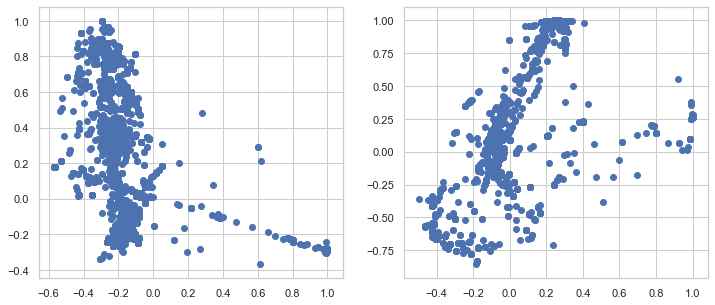

In [116]:
# 모형의 차이 : sample
plt.figure(figsize=(12,5))
plt.subplot(1,2,1); plt.scatter(corr_SVD_user[:,1], corr_SVD_user[:,-2])
plt.subplot(1,2,2); plt.scatter(corr_PCA_user[:,1], corr_PCA_user[:,-2])
plt.show()

In [ ]:
from sklearn.neighbors import NearestNeighbors

#make an object for the NearestNeighbors Class.
model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)

# fit the dataset
model_knn.fit(movie_user_mat_sparse)

In [ ]:
def make_recommendation(model_knn, data, mapper, fav_movie, n_recommendations):
    
    # fit
    model_knn.fit(data)
    # get input movie index
    print('You have input movie:', fav_movie)
    idx = fuzzy_matching(mapper, fav_movie, verbose=True)
    
    print('Recommendation system start to make inference')
    print('......\n')
    distances, indices = model_knn.kneighbors(data[idx], n_neighbors=n_recommendations+1)
    
    raw_recommends = \
        sorted(list(zip(indices.squeeze().tolist(), distances.squeeze().tolist())), key=lambda x: x[1])[:0:-1]
    # get reverse mapper
    reverse_mapper = {v: k for k, v in mapper.items()}
    # print recommendations
    print('Recommendations for {}:'.format(fav_movie))
    for i, (idx, dist) in enumerate(raw_recommends):
        print('{0}: {1}, with distance of {2}'.format(i+1, reverse_mapper[idx], dist))

In [20]:
import surprise

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [ ]:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(ds['description'])

In [ ]:
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix) results = {}
for idx, row in ds.iterrows():
    similar_indices = cosine_similarities[idx].argsort()[:-100:-1] 
    similar_items = [(cosine_similarities[idx][i], ds['id'][i]) for i in similar_indices] 
    results[row['id']] = similar_items[1:]

In [ ]:
def item(id): 
    return ds.loc[ds['id'] == id]['description'].tolist()[0].split(' - ')[0] 

# Just reads the results out of the dictionary.def 
recommend(item_id, num):
    print("Recommending " + str(num) + " products similar to " + item(item_id) + "...")   
    print("-------")    recs = results[item_id][:num]   
    for rec in recs: 
       print("Recommended: " + item(rec[1]) + " (score:" +      str(rec[0]) + ")")